In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pwd/

'C:\\Users\\DOREEN DOMPREH\\Downloads\\python-for-deep-learning-and-ai'

In [3]:
df = pd.read_csv('data/spam.tsv', sep = '\t')

In [4]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.isnull().sum()

label      0
message    0
dtype: int64

In [6]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [7]:
df['message']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message, Length: 5572, dtype: object

In [8]:
!pip install spacy


  Using cached spacy-3.7.2-cp39-cp39-win_amd64.whl (12.2 MB)


In [10]:
!python -m spacy download en_core_web_sm

     -------------------------------------- 12.8/12.8 MB 212.9 kB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [11]:
!pip install beautifulsoup4

In [12]:
!pip install textblob

     ------------------------------------ 636.8/636.8 kB 290.6 kB/s eta 0:00:00


In [13]:
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to c:\users\doreen dompreh\appdata\local\temp\pip-req-build-4t4rw6tz
  Resolved https://github.com/laxmimerit/preprocess_kgptalkie.git to commit 96bf02872d9756f29d6cddb8aafaedcd2a39bbb4
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=7647 sha256=5183cebe9693adad227dcdf4b44086e074a67bb17ea6e8ae30e252f3e9d401fe
  Stored in directory: C:\Users\DOREEN DOMPREH\AppData\Local\Temp\pip-ephem-wheel-cache-fk9nit5_\wheels\d1\c3\bb\559fe93e652b51cbc532f17e9693f3b70055f8560cf06c1fb3
Successfully built preprocess-kgptalkie
  Attempting uninstall: preprocess-kgptalkie
    Found existing installation: preprocess-kgptalkie 0.1.3
    Uninstalling preprocess-kgptalkie-0.1.3:
      Successfully uninstalled preprocess-kgptalkie-0.1.3


  Running command git clone --filter=blob:none --quiet https://github.com/laxmimerit/preprocess_kgptalkie.git 'C:\Users\DOREEN DOMPREH\AppData\Local\Temp\pip-req-build-4t4rw6tz'


In [14]:
def get_clean(x):
    x = str(x).lower().replace('\\', '').replace('_', ' ')
    x = ps.cont_exp(x)
    x = ps.remove_emails(x)
    x = ps.remove_urls(x)
    x = ps.remove_html_tags(x)
    x = ps.remove_accented_chars(x)
    x = ps.remove_special_chars(x)
    x = re.sub("(.)\\1{2,}", "\\1", x)
    return x

In [15]:
import preprocess_kgptalkie as ps

In [16]:
df['wordcounts'] = df['message'].apply(lambda x: ps.get_wordcounts(x))
df['charcounts'] = df['message'].apply(lambda x: ps.get_charcounts(x))
df['avg_wordlengths'] = df['message'].apply(lambda x: ps.get_avg_wordlength(x))
df['stop_wordcounts'] = df['message'].apply(lambda x: ps.get_stopwords_counts(x))
df['digit_counts'] = df['message'].apply(lambda x: ps.get_digit_counts(x))
df['uppercase_counts'] = df['message'].apply(lambda x: ps.get_uppercase_counts(x))
df

,label,message,wordcounts,charcounts,avg_wordlengths,stop_wordcounts,digit_counts,uppercase_counts
0,ham,"Go until jurong point, crazy.. Available only ...",20,92,4.600000,4,4,0
1,ham,Ok lar... Joking wif u oni...,6,24,4.000000,0,2,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,128,4.571429,5,6,2
3,ham,U dun say so early hor... U c already then say...,11,39,3.545455,4,2,2
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,49,3.769231,6,1,1
...,...,...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,30,131,4.366667,9,12,2
5568,ham,Will ü b going to esplanade fr home?,8,29,3.625000,1,0,0
5569,ham,"Pity, * was in mood for that. So...any other s...",10,48,4.800000,4,3,0
5570,ham,The guy did some bitching but I acted like i'd...,26,100,3.846154,14,0,1


## Virtualize Text Data (Pair Plot)

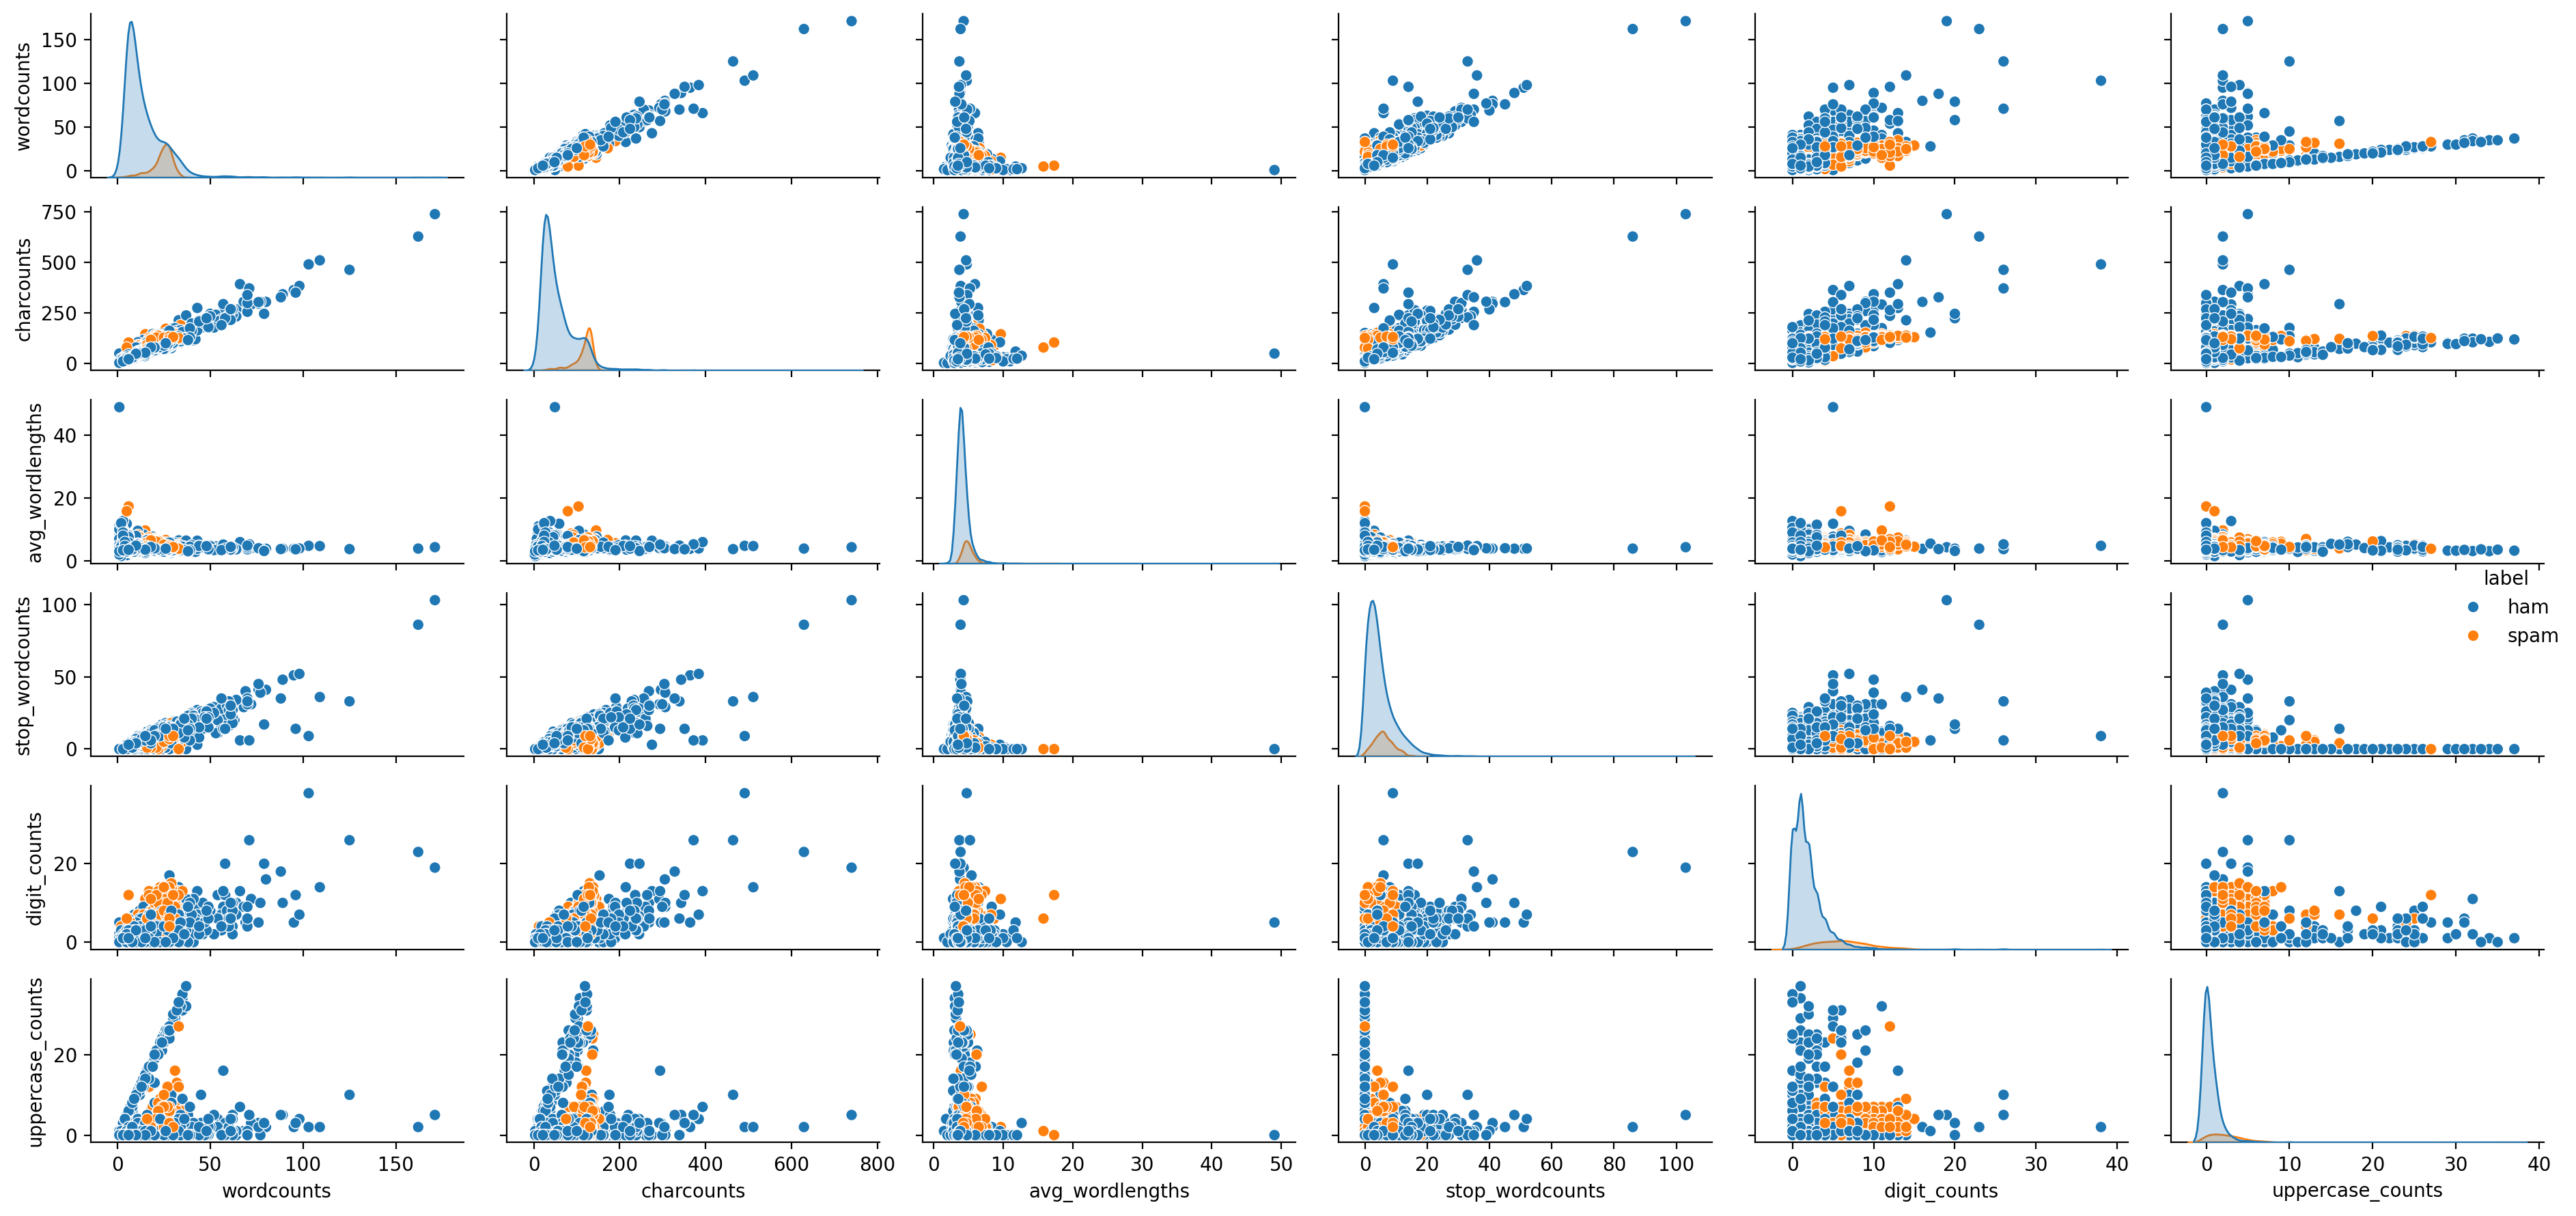

In [17]:
plt.rcParams['figure.dpi'] = 200
sns.pairplot(df, hue= 'label', height = 1.5, aspect = 2)
plt.tight_layout()

## Train Test Split

In [35]:
from sklearn.model_selection import train_test_split

In [41]:
x_train, x_test, y_train, y_test = train_test_split(df['message'], df['label'], stratify= df['label'], random_state=0)

In [42]:
x_train.shape, x_test.shape

((4179,), (1393,))

## TF-IDF VECTORIZATION

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [44]:
tfidf = TfidfVectorizer()
x_train = tfidf.fit_transform(x_train)
x_test = tfidf.transform(x_test)

In [50]:
unique_vocab = len(tfidf.get_feature_names_out())

In [51]:
x_train.toarray()[0]

array([0., 0., 0., ..., 0., 0., 0.])

## Model Building

In [52]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

In [53]:
svm = LinearSVC()
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)

print(classification_report(y_test, y_pred))

C:\Users\DOREEN DOMPREH\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1206
        spam       0.96      0.88      0.92       187

    accuracy                           0.98      1393
   macro avg       0.97      0.94      0.96      1393
weighted avg       0.98      0.98      0.98      1393



## Prediction on any text

In [55]:
text = ['i am sending you tickets for USA']
text = tfidf.transform(text)
text.toarray().shape
svm.predict(text)

array(['ham'], dtype=object)

In [57]:
text = ['you have won tickets to the USA this summer']
text = tfidf.transform(text)
text.toarray().shape
svm.predict(text)

array(['spam'], dtype=object)

In [58]:
text = ['hey, whatsup!']
text = tfidf.transform(text)
text.toarray().shape
svm.predict(text)

array(['ham'], dtype=object)

In [61]:
text = ['you won the medal']
text = tfidf.transform(text)
text.toarray().shape
svm.predict(text)

array(['spam'], dtype=object)

## Model Load and Save

In [62]:
import pickle
import os

In [63]:
os.makedirs('model_nlp', exist_ok=True)
pickle.dump(tfidf, open('model_nlp/tfidf.pkl', 'wb'))
pickle.dump(svm, open('model_nlp/svm.pkl', 'wb'))

tfidf1 = pickle.load(open('model_nlp/tfidf.pkl', 'rb'))
svm1 = pickle.load(open('model_nlp/svm.pkl', 'rb'))

In [64]:
text = ['you won the medal']
text = tfidf.transform(text)
text.toarray().shape
svm.predict(text)

array(['spam'], dtype=object)

In [65]:
text = ['hey, whatsup!']
text = tfidf.transform(text)
text.toarray().shape
svm.predict(text)

array(['ham'], dtype=object)

In [66]:
text = ['you have won tickets to the USA this summer']
text = tfidf.transform(text)
text.toarray().shape
svm.predict(text)

array(['spam'], dtype=object)